# Content Analysis of the Russian Federation's Ministry of Foreign Affairs' materials

## I. Collecting necessary data 

### 1.1. Approach

This project analyzes official statements, speeches, briefings and comments by Russian Federation's Minister of Foreign Affairs Sergey Lavrov, the Deputy Ministers and the Official Representative Maria Zakharova during the period of 2023-2013. 


Source of data: official website of the Ministry of Foreign Affairs of the Russian Federation (https://www.mid.ru).
Language of collected materials: Russian.


All data is collected automatically and stored in separate .txt files (please see .zip archive attached).


All materials fall into six categories (as it is organized on the official website): 
1. minister_speeches 
2. deputy_ministers_speeches
3. spokesman_briefings
4. spokesman_official_statements
5. spokesman_answers
6. spokesman_comments


File name format: "file_id.txt".

### 1.2 Environment Setup & Discovering the available data

In [1]:
categories = {"minister_speeches": "https://www.mid.ru/ru/press_service/minister_speeches/?PAGEN_1",
              "deputy_ministers_speeches": "https://www.mid.ru/ru/press_service/deputy_ministers_speeches/?PAGEN_1",
              "spokesman_briefings": "https://www.mid.ru/ru/press_service/spokesman/briefings/?PAGEN_1",
              "spokesman_official_statements": "https://www.mid.ru/ru/press_service/spokesman/official_statement/?PAGEN_1",
              "spokesman_answers": "https://www.mid.ru/ru/press_service/spokesman/answers/?PAGEN_1",
              "spokesman_comments": "https://www.mid.ru/ru/press_service/spokesman/kommentarii/?PAGEN_1"}

categories_limits = {"minister_speeches": 345,
              "deputy_ministers_speeches": 32,
              "spokesman_briefings": 22,
              "spokesman_official_statements": 39,
              "spokesman_answers": 55,
              "spokesman_comments": 141}

In [ ]:
for category in categories:
    collect_category(category)

### 1.3. Collecting data

In [ ]:
for category in categories:
    collect_category_units(category)

## II. Data processing & overview

### 2.1. Preprocessing 

In [21]:
import pandas as pd
from datetime import date
import re

In [77]:
def read_record(record_path):
    with open(record_path, "r", encoding="utf-8") as unit_f:
        tmp = unit_f.readlines()
        article_day, article_month, article_year = tmp[0][:-1].split('.')
        article_day, article_month, article_year = int(article_day), int(article_month), int(article_year) 
        # article_date = date(article_year, article_month, article_day)
        article_name = tmp[1]
        num_China = 0
        num_Ukraine = 0
        article_num_words = 0
        for tmp_ in tmp[2:]:
            num_China += len(re.findall(r"[а-яА-ЯёЁ]*китай[а-яА-ЯёЁ]*", tmp_, re.IGNORECASE))
            num_Ukraine += len(re.findall(r"[а-яА-ЯёЁ]*украин[а-яА-ЯёЁ]*", tmp_, re.IGNORECASE))
            num_China += len(re.findall(r"[а-яА-ЯёЁ]*пекин[а-яА-ЯёЁ]*", tmp_, re.IGNORECASE))
            num_Ukraine += len(re.findall(r"[а-яА-ЯёЁ]*киев[а-яА-ЯёЁ]*", tmp_, re.IGNORECASE))
            article_num_words += len(tmp_.split())
        record = {"Article id": article_number, "Article year": article_year, "Article month": article_month, 
                  "Article day": article_day, "Article name": article_name, "Article size": article_num_words, 
                  "China count": num_China, "Ukraine count": num_Ukraine} 
        return record

In [79]:
results = []
for category in categories:
    f_path =f'articles\\{category}.txt'
    with open(f_path, "r") as f:
        articles = f.readlines()
        for article_url in articles:
            article_number = article_url[-9:-2]
            cat_f_path = f"{category}\\{article_number}.txt"
            record = read_record(cat_f_path)
            record["Article category"] = category
            record["Article url"] = article_url
            results.append(record)

In [102]:
df = pd.DataFrame(results)
df = df[(df["Article year"] >= 2013) & (df["Article year"] <= 2023)]
df.to_excel("output.xlsx", sheet_name='Output')  
df.head()

,Article id,Article year,Article month,Article day,Article name,Article size,China count,Ukraine count,Article category,Article url
0,1914324,2023,11,10,Видеообращение Министра иностранных дел России...,251,0,0,minister_speeches,https://www.mid.ru/ru/press_service/minister_s...
1,1914059,2023,11,9,Ответы Министра иностранных дел Российской Фед...,75,0,2,minister_speeches,https://www.mid.ru/ru/press_service/minister_s...
2,1913921,2023,11,8,Выступление Министра иностранных дел Российско...,1886,1,10,minister_speeches,https://www.mid.ru/ru/press_service/minister_s...
3,1913533,2023,11,6,Выступление и ответы на вопросы Министра иност...,4059,4,13,minister_speeches,https://www.mid.ru/ru/press_service/minister_s...
4,1913456,2023,11,5,Ответы Министра иностранных дел Российской Фед...,279,0,0,minister_speeches,https://www.mid.ru/ru/press_service/minister_s...


In [103]:
df.shape

(7854, 10)

### 2.2. Data overview

#### 2.2.1. Overall number of articles

In [104]:
print(df.shape[0], "articles collected")

7854 articles collected


#### 2.2.2. Number of articles by 1) category, 2) year, 3) year and category, 4) year and month

In [105]:
cat_count = pd.DataFrame(df.groupby("Article category")["Article id"].count())
cat_count = cat_count.reset_index()
cat_count.columns = ["Category", "Number of Articles"]
cat_count

,Category,Number of Articles
0,deputy_ministers_speeches,305
1,minister_speeches,3439
2,spokesman_answers,534
3,spokesman_briefings,404
4,spokesman_comments,2792
5,spokesman_official_statements,380


In [106]:
year_count = pd.DataFrame(df.groupby("Article year")["Article id"].count())
year_count = year_count.reset_index()
year_count.columns = ["Year", "Number of Articles"]
year_count

,Year,Number of Articles
0,2013,591
1,2014,921
2,2015,738
3,2016,774
4,2017,775
5,2018,674
6,2019,766
7,2020,654
8,2021,650
9,2022,672


In [107]:
df.groupby(["Article year", "Article category"])["Article id"].count().unstack()

Article category,deputy_ministers_speeches,minister_speeches,spokesman_answers,spokesman_briefings,spokesman_comments,spokesman_official_statements
Article year,,,,,,
2013,55,263,53,14,186,20
2014,63,293,58,15,419,73
2015,33,311,42,23,296,33
2016,47,340,43,43,277,24
2017,22,362,34,45,295,17
2018,18,312,31,47,248,18
2019,13,407,19,39,280,8
2020,15,255,33,48,275,28
2021,26,344,41,45,171,23


#### 2.2.3. Number of articles that contain "China" (or the relative words)

In [108]:
df_china = df[df["China count"] > 0]
print(df_china.shape[0], "articles contain 'China' (or the relative words)")

990 articles contain 'China' (or the relative words)


In [109]:
year_china = pd.DataFrame(df_china.groupby("Article year")["Article id"].count())
year_china = year_china.reset_index()
year_china.columns = ["Year", "Number of Articles with 'CHINA'"]
year_china

,Year,Number of Articles with 'CHINA'
0,2013,51
1,2014,54
2,2015,70
3,2016,80
4,2017,84
5,2018,95
6,2019,101
7,2020,99
8,2021,110
9,2022,120


<AxesSubplot:xlabel='Year'>

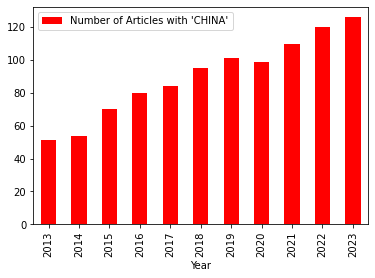

In [125]:
year_china.plot.bar(x="Year", y="Number of Articles with 'CHINA'", color="red")

#### 2.2.4. Number of articles that contain "Ukraine" (or the relative words)

In [111]:
df_ukraine = df[df["Ukraine count"] > 0]
print(df_ukraine.shape[0], "articles contain 'Ukraine' (or the relative words)")

2682 articles contain 'Ukraine' (or the relative words)


In [112]:
year_ukraine = pd.DataFrame(df_ukraine.groupby("Article year")["Article id"].count())
year_ukraine = year_ukraine.reset_index()
year_ukraine.columns = ["Year", "Number of Articles with 'UKRAINE'"]
year_ukraine

,Year,Number of Articles with 'UKRAINE'
0,2013,54
1,2014,504
2,2015,285
3,2016,225
4,2017,225
5,2018,190
6,2019,190
7,2020,132
8,2021,182
9,2022,359


<AxesSubplot:xlabel='Year'>

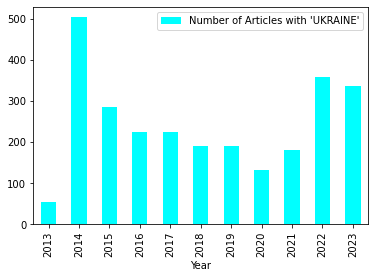

In [115]:
year_ukraine.plot.bar(x="Year", y="Number of Articles with 'UKRAINE'", color="aqua")

#### 2.2.5. Visual comparison between numbers of articles that contain "Ukraine" (or the relative words) and "China" (or the relative words)

In [121]:
ukraine_china = year_china
ukraine_china["Number of Articles with 'UKRAINE'"] = year_ukraine["Number of Articles with 'UKRAINE'"]
ukraine_china = ukraine_china.set_index("Year")
ukraine_china

,Number of Articles with 'CHINA',Number of Articles with 'UKRAINE'
Year,,
2013,51,54
2014,54,504
2015,70,285
2016,80,225
2017,84,225
2018,95,190
2019,101,190
2020,99,132
2021,110,182


<AxesSubplot:xlabel='Year'>

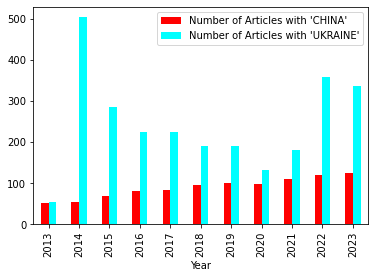

In [124]:
ukraine_china.plot.bar(color={"Number of Articles with 'CHINA'": "red", "Number of Articles with 'UKRAINE'": "aqua"})